1.Add required libraries

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn import model_selection , naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

2.Set random seed

In [3]:
np.random.seed(500)

3. Add the data

In [4]:
train_data = pd.read_csv('C:/Users/swapn/Downloads/Kaggle/train.csv') 
test_data = pd.read_csv('C:/Users/swapn/Downloads/Kaggle/test.csv')

In [5]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


4.Data Pre-processing

In [6]:
#Remove blank  rows if any
train_data.dropna(inplace=True)

In [7]:
train_data.drop('location', axis = 1, inplace = True)
test_data.drop('location', axis = 1, inplace = True)

Removing URL, emoji and html tags

In [8]:
def add_space_between_emojies(text):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
    text = re.sub(EMOJI_PATTERN, r'\1', text)
    return text

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

def remove_url(text):
    url = re.compile(r'https?:\/\/.*')
    return re.sub(url,'', text)



In [9]:
train_data['cleaned_text'] = train_data['text'].apply(add_space_between_emojies)
train_data['cleaned_text'] = train_data['cleaned_text'].apply(remove_url)
train_data['cleaned_text'] = train_data['cleaned_text'].apply(remove_html)

In [10]:
test_data['cleaned_text'] = test_data['text'].apply(add_space_between_emojies)
test_data['cleaned_text'] = test_data['cleaned_text'].apply(remove_url)
test_data['cleaned_text'] = test_data['cleaned_text'].apply(remove_html)

In [11]:
#Remove punctuations and convert it into lower
train_data['cleaned_text'] = train_data['cleaned_text'].str.replace(r'[^\w\s]',' ').str.lower()
test_data['cleaned_text'] = test_data['cleaned_text'].str.replace(r'[^\w\s]',' ').str.lower()

C:\Users\swapn\AppData\Local\Temp/ipykernel_121192/4087601915.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['cleaned_text'] = train_data['cleaned_text'].str.replace(r'[^\w\s]',' ').str.lower()
C:\Users\swapn\AppData\Local\Temp/ipykernel_121192/4087601915.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['cleaned_text'] = test_data['cleaned_text'].str.replace(r'[^\w\s]',' ').str.lower()


Tokenizing the cleaned_text

In [12]:
#We will use stop words to remove unnecessary words
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [13]:
def clean(text):
    text=re.sub(r'[^\w\s]',' ',text).lower()   ### Remove punctuation by removing non-space alpha-num characters
    words=re.split(r'\W+', text)                   ### Split by remaining non-alphanumeric characters 
    non_stop_words=[word for word in words if word not in stopword]        ### Remove stopwords
    lem_words= [wn.lemmatize(word) for word in non_stop_words]             ### Clean text ==
    clean_text= ' '.join(lem_words)
    return clean_text

In [14]:
train_data['words'] = train_data['cleaned_text'].apply(clean)
test_data['words'] = test_data['cleaned_text'].apply(clean)

In [15]:
train_data.drop(['text','cleaned_text'], axis = 1, inplace = True)
test_data.drop(['text','cleaned_text'], axis = 1, inplace = True)


In [16]:
train_data

,id,keyword,target,words
31,48,ablaze,1,bbcmtd wholesale market ablaze
32,49,ablaze,0,always try bring heavy metal rt
33,50,ablaze,1,africanbaze breaking news nigeria flag set ab...
34,52,ablaze,0,cry set ablaze
35,53,ablaze,0,plus side look sky last night ablaze
...,...,...,...,...
7575,10826,wrecked,0,bright side wrecked
7577,10829,wrecked,0,widda16 gone relax thought wife wrecked cake ...
7579,10831,wrecked,0,three day work pretty much wrecked hahaha shou...
7580,10832,wrecked,0,fx forex trading cramer iger 3 word wrecked d...


In [17]:
#!pip install textblob
from textblob import TextBlob

In [18]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

In [19]:
train_data['sentiment']= train_data['words'].apply(get_sentiment)

In [20]:
train_data[['polarity','subjectivity']]=train_data.sentiment.to_list()

<AxesSubplot:>

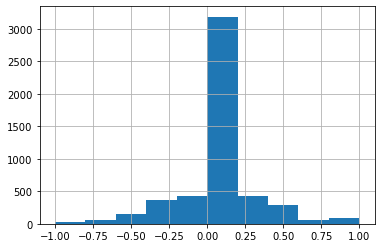

In [21]:
train_data.polarity.hist()

<AxesSubplot:>

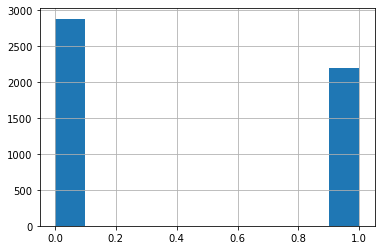

In [22]:
train_data['target'].hist()

In [23]:
train_data.sort_values(by='polarity', ascending=False)

,id,keyword,target,words,sentiment,polarity,subjectivity
413,599,arsonist,0,nowplaying arsonist mc impressed arsonistmusic,"(1.0, 1.0)",1.0,1.0
4972,7089,meltdown,0,read awesome book yet two trillion dollar melt...,"(1.0, 1.0)",1.0,1.0
3530,5046,eyewitness,1,rt patrickjbutler excellent damiengayle eyewit...,"(1.0, 1.0)",1.0,1.0
6785,9719,tragedy,0,homeworldgym thisisperidot tragedy wonderful ...,"(1.0, 1.0)",1.0,1.0
2040,2929,danger,1,bluebirddenver fettilootch slanglucci oppress...,"(1.0, 1.0)",1.0,1.0
...,...,...,...,...,...,...,...
4849,6908,mass%20murderer,0,creel must think real moron flag man brainles...,"(-1.0, 1.0)",-1.0,1.0
5856,8367,ruin,0,go ruin something awful minion,"(-1.0, 1.0)",-1.0,1.0
6672,9563,thunder,0,worst part seeing lightning trying guess thund...,"(-1.0, 1.0)",-1.0,1.0
5857,8368,ruin,0,really awful cant even work make artist ruin t...,"(-1.0, 1.0)",-1.0,1.0


TFID Vectorization

In [24]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,3)) # one,two and three gram vectorization
tf_idf_mat = tf_idf_vect.fit_transform(train_data['words'].values) # fit_transform vectorizer to dtrain['text']
tf_idf_mat_test = tf_idf_vect.transform(test_data['words'].values) # fit_transform vectorizer to dtest['text']
type(tf_idf_mat)
print(tf_idf_mat.get_shape())

(5080, 74065)


In [25]:
target = train_data['target']

x , x_test, y, y_test = train_test_split(tf_idf_mat, target, test_size = 0.2, train_size = 0.8, random_state = 0)


Build a classification table

Multinomial Naive Bayes is the most popular supervised learning classifications that is used in NLP

In [26]:
clf = MultinomialNB(alpha = 1).fit(x,y)
predicted = clf.predict(x_test)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predicted, y_test)*100)

Naive Bayes Accuracy Score ->  77.85433070866141


Hyperparameter tune using Training Data

In [27]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.01, 0.1,0.5,1.0, 10.0],}  #alpha - It accepts float value representing the additive smoothing parameter. The value of 0.0 represents no smoothing. The default value of this parameter is 1.0.

multinomial_grid = GridSearchCV(MultinomialNB(), param_grid = params, n_jobs= -1, cv = 5, verbose = 5 )
multinomial_grid.fit(x,y)
print('Best Accuracy Through Grid Search : %.3f'%multinomial_grid.best_score_)
print('Best Parameters : ',multinomial_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Accuracy Through Grid Search : 0.788
Best Parameters :  {'alpha': 0.5}


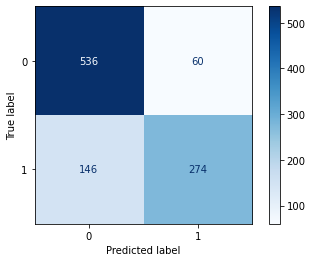

In [28]:
disp = plot_confusion_matrix(multinomial_grid, x_test,y_test, cmap = 'Blues', values_format ='.3g')
plt.show()

In [29]:
#Precision = True Positive / (True Positive + False Positive) 
#Recall = True Positive / (True Positive + False Negative) 

Precision = 536/ (536+146)
Recall = 536 / (536 + 60)
print('Precision is : ', Precision)
print('Recall is : ' ,Recall)
f1_score = 2 * (0.7859237536656891 * 0.8993288590604027) / ( 0.7859237536656891 + 0.8993288590604027)
print('F1_score is : ', f1_score)

Precision is :  0.7859237536656891
Recall is :  0.8993288590604027
F1_score is :  0.838810641627543


# Support Vector Machine

In [30]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto').fit(x,y)
SVM_predicted = SVM.predict(x_test)
print("Support Vector Machine accuracy -> ",accuracy_score(SVM_predicted, y_test)*100)

Support Vector Machine accuracy ->  78.54330708661418


Hyperparameter tuning 

In [31]:
kernel = ['linear','rbf','poly', 'sigmoid']

for i in kernel:
    svc = svm.SVC(kernel = i, C = 1.0)
    svc.fit(x,y)
    print('For kernel: ', i)
    print('Accuracy is : ', svc.score(x_test, y_test))


For kernel:  linear
Accuracy is :  0.7854330708661418
For kernel:  rbf
Accuracy is :  0.7244094488188977
For kernel:  poly
Accuracy is :  0.6604330708661418
For kernel:  sigmoid
Accuracy is :  0.7844488188976378


In [32]:
parameters = [{'C': [1,10,100], 'kernel': ['linear']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(x,y)

In [33]:
print('Accuracy is : ', grid_search.score(x_test, y_test))
print('param_grid : ',grid_search.best_params_)

Accuracy is :  0.7854330708661418
param_grid :  {'C': 1, 'kernel': 'linear'}


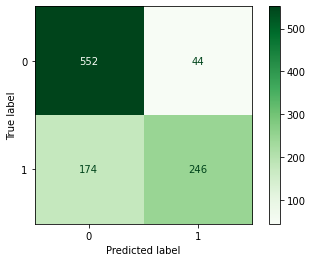

In [34]:
disp = plot_confusion_matrix(grid_search, x_test,y_test,cmap = 'Greens', values_format ='.3g')
plt.show()

In [35]:
#Precision = True Positive / (True Positive + False Positive) 
#Recall = True Positive / (True Positive + False Negative) 

Precision = 552/ (552+174)
Recall = 552 / (552 + 44)
print('Precision is : ', Precision)
print('Recall is : ' ,Recall)
f1_score = 2 * (0.7603305785123967 * 0.9261744966442953) / (0.7603305785123967 + 0.9261744966442953)
print('F1_score is : ', f1_score)

Precision is :  0.7603305785123967
Recall is :  0.9261744966442953
F1_score is :  0.8350983358547656


In [64]:
submission = pd.read_csv('C:/Users/swapn/Downloads/Kaggle/sample_submission.csv')
preds = multinomial_grid.predict(tf_idf_mat_test)
submission['target'] = preds
submission.to_csv('C:/Users/swapn/Downloads/Kaggle/sample_submission.csv', index =False)

In [37]:
submission = pd.read_csv('C:/Users/swapn/Downloads/Kaggle/sample_submission.csv')
preds = grid_search.predict(tf_idf_mat_test)
submission['target'] = preds
submission.to_csv('C:/Users/swapn/Downloads/Kaggle/sample_submission.csv', index =False)

# Aspect Based Sentiment Analysis

In [38]:
import spacy 
from spacy import displacy

In [39]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [40]:
nlp = spacy.load('en_core_web_sm')

In [41]:
def get_aspects(text):
    doc=nlp(text)
    noun_adj_pairs=[]
    #print([ (c, c.pos_) for c in doc])
    for i,token in enumerate(doc):

        
        ### Extract noun, adjective pairs where adjectives are
        ###  after the noun  (the food was (not) tasty)
        
        if token.pos_ in ('NOUN','PROPN'):
            if i <len(doc)-1 :
                adj=''
                
                for j in range(i+1,len(doc)):
                    
                    if doc[j].text in  ['no', 'not']:  
                        adj += 'not '
    
                    if doc[j].pos_   == 'ADJ':
                        adj += doc[j].text 
                        noun_adj_pairs.append((token.text,adj))
                        break
        
        ### Extract noun, adjective pairs where adjectives are
        ###  before the nouns: noun phrases (the tasty food)
        
        if token.pos_ in ('ADJ'):
            if i <len(doc) -1:
                if doc[i+1].pos_ in ('NOUN'):
                    noun_adj_pairs.append((doc[i+1].text, token.text))
                    break

    return noun_adj_pairs

In [42]:
all_aspects=[]

train_data['aspects']=train_data['words'].apply(get_aspects)

In [43]:
from collections import defaultdict

all_asspects=defaultdict(list)

for i, aspect_review in train_data['aspects'].iteritems():
    for aspect in aspect_review:
        all_asspects[aspect[0]].append(aspect[1])

In [44]:
aspect_count=[]
for aspect, sentiment in all_asspects.items():
    aspect_count.append((aspect, len(sentiment)))

In [45]:
aspect_count.sort(key=lambda x: x[1], reverse=True)
aspect_count

[('fire', 90),
 ('disaster', 62),
 ('u', 61),
 ('people', 58),
 ('family', 55),
 ('time', 47),
 ('man', 45),
 ('news', 45),
 ('year', 41),
 ('day', 41),
 ('police', 40),
 ('flood', 40),
 ('emergency', 38),
 ('body', 37),
 ('life', 37),
 ('rt', 35),
 ('storm', 34),
 ('û', 31),
 ('video', 30),
 ('weapon', 30),
 ('obama', 29),
 ('work', 29),
 ('death', 28),
 ('attack', 28),
 ('car', 27),
 ('thing', 26),
 ('_', 26),
 ('thunderstorm', 26),
 ('world', 25),
 ('woman', 24),
 ('accident', 23),
 ('today', 23),
 ('weather', 23),
 ('water', 23),
 ('legionnaire', 23),
 ('outbreak', 23),
 ('hiroshima', 22),
 ('forest', 21),
 ('fedex', 21),
 ('building', 21),
 ('flag', 20),
 ('way', 20),
 ('war', 20),
 ('home', 20),
 ('injury', 20),
 ('fatality', 20),
 ('california', 19),
 ('train', 19),
 ('city', 19),
 ('wave', 19),
 ('sound', 19),
 ('service', 18),
 ('boy', 18),
 ('bomb', 18),
 ('typhoon', 18),
 ('sue', 18),
 ('quarantine', 18),
 ('night', 17),
 ('light', 17),
 ('eye', 17),
 ('love', 17),
 ('collap

In [46]:
aspect_count = pd.DataFrame(aspect_count)
#aspect_count.drop([2], inplace = True)
aspect_count.rename(columns = {0: 'Aspects',1:'Frequency'},inplace = True)

In [47]:
aspect_count.head()

,Aspects,Frequency
0,fire,90
1,disaster,62
2,u,61
3,people,58
4,family,55


# TOPIC MODELLING 

In [48]:
from gensim import models, corpora

In [49]:
dictionary = corpora.Dictionary(train_data['words'].str.split(' '))

In [50]:
corpus = [dictionary.doc2bow(text) for text in train_data['words'].str.split(' ') ]

In [51]:
corpus

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(0, 2),
  (1, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(1, 1), (17, 1), (18, 1)],
 [(0, 1), (1, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(0, 2),
  (1, 1),
  (17, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(0, 1), (1, 1), (17, 1), (36, 1), (37, 1), (38, 1)],
 [(1, 1), (39, 1)],
 [(0, 1), (40, 1)],
 [(0, 1),
  (1, 1),
  (38, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(0, 1), (1, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)],
 [(0, 1), (40, 1)],
 [(0, 1),
  (21, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(0, 1), (1, 1)

In [52]:
lda = models.LdaModel(corpus, id2word = dictionary, num_topics = 10)

In [53]:
lda.get_topics().shape

(10, 11793)

In [54]:
for i in range(10):
    print(lda.print_topics(i))

[(7, '0.084*"" + 0.016*"mh370" + 0.013*"trouble" + 0.013*"pm" + 0.013*"malaysia" + 0.012*"confirmed" + 0.010*"family" + 0.010*"volcano" + 0.009*"wreck" + 0.007*"time"'), (0, '0.086*"" + 0.018*"disaster" + 0.016*"released" + 0.014*"obama" + 0.008*"typhoon" + 0.008*"hail" + 0.008*"declares" + 0.007*"devastated" + 0.007*"saipan" + 0.007*"new"'), (5, '0.122*"" + 0.011*"violent" + 0.011*"video" + 0.011*"pkk" + 0.011*"traumatised" + 0.010*"tragedy" + 0.009*"zone" + 0.007*"turkey" + 0.007*"youtube" + 0.007*"war"'), (8, '0.051*"" + 0.030*"siren" + 0.022*"thunderstorm" + 0.020*"severe" + 0.014*"10" + 0.012*"05" + 0.012*"warning" + 0.008*"9" + 0.008*"august" + 0.008*"issued"'), (4, '0.130*"" + 0.012*"screaming" + 0.011*"trapped" + 0.008*"weapon" + 0.007*"trauma" + 0.006*"police" + 0.005*"lightning" + 0.005*"day" + 0.005*"say" + 0.005*"one"'), (3, '0.121*"" + 0.009*"officer" + 0.008*"û_" + 0.008*"survivor" + 0.007*"like" + 0.006*"fire" + 0.006*"home" + 0.006*"soudelor" + 0.005*"police" + 0.005*"s

In [55]:
lda.get_topic_terms(0)

[(0, 0.08592136),
 (1793, 0.01770417),
 (1424, 0.01566541),
 (1379, 0.014176455),
 (4640, 0.008231174),
 (1065, 0.007823878),
 (6007, 0.0075390036),
 (5994, 0.0070312326),
 (6010, 0.0069555533),
 (33, 0.006720829)]

In [56]:
topic_words = {}

for i in range(lda.num_topics):
    topic_words[i] = [dictionary[j] for (j, val) in lda.get_topic_terms(i)]

In [57]:
topic = pd.DataFrame(topic_words)[1:]

In [58]:
topic_disp = list(lda[corpus])
topic_disp

[[(0, 0.014315781),
  (1, 0.01431603),
  (2, 0.014314979),
  (3, 0.014315843),
  (4, 0.014315952),
  (5, 0.7199068),
  (6, 0.014316035),
  (7, 0.1655683),
  (8, 0.014314849),
  (9, 0.014315398)],
 [(0, 0.012508505),
  (1, 0.012508558),
  (2, 0.012509287),
  (3, 0.32868454),
  (4, 0.012510432),
  (5, 0.012511064),
  (6, 0.012509382),
  (7, 0.012506423),
  (8, 0.57124454),
  (9, 0.012507228)],
 [(5, 0.9180718)],
 [(0, 0.77490884),
  (1, 0.025011431),
  (2, 0.02500806),
  (3, 0.025009334),
  (4, 0.025009291),
  (5, 0.02501708),
  (6, 0.025009256),
  (7, 0.025011078),
  (8, 0.025007723),
  (9, 0.025007952)],
 [(0, 0.011116826),
  (1, 0.73518866),
  (2, 0.01111558),
  (3, 0.011117222),
  (4, 0.011117711),
  (5, 0.011117778),
  (6, 0.17587034),
  (7, 0.011116724),
  (8, 0.011123392),
  (9, 0.011115763)],
 [(6, 0.94360226)],
 [(0, 0.15969016),
  (1, 0.014296785),
  (2, 0.0142935915),
  (3, 0.014296887),
  (4, 0.014294263),
  (5, 0.01429587),
  (6, 0.014295325),
  (7, 0.72594917),
  (8, 0.0142

In [59]:
from gensim import matutils

In [60]:
topic_dist = matutils.corpus2dense(topic_disp, lda.num_topics).T

In [61]:
with_topics = pd.concat([train_data, pd.DataFrame(topic_dist, index = train_data.index)], axis = 'columns')

In [62]:
with_topics

,id,keyword,target,words,sentiment,polarity,subjectivity,aspects,0,1,2,3,4,5,6,7,8,9
31,48,ablaze,1,bbcmtd wholesale market ablaze,"(0.0, 0.0)",0.000000,0.000000,"[(bbcmtd, wholesale), (market, wholesale)]",0.014316,0.014316,0.014315,0.014316,0.014316,0.719907,0.014316,0.165568,0.014315,0.014315
32,49,ablaze,0,always try bring heavy metal rt,"(-0.2, 0.5)",-0.200000,0.500000,"[(metal, heavy)]",0.012509,0.012509,0.012509,0.328685,0.012510,0.012511,0.012509,0.012506,0.571245,0.012507
33,50,ablaze,1,africanbaze breaking news nigeria flag set ab...,"(0.0, 0.0)",0.000000,0.000000,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.918072,0.000000,0.000000,0.000000,0.000000
34,52,ablaze,0,cry set ablaze,"(0.0, 0.0)",0.000000,0.000000,[],0.774909,0.025011,0.025008,0.025009,0.025009,0.025017,0.025009,0.025011,0.025008,0.025008
35,53,ablaze,0,plus side look sky last night ablaze,"(0.0, 0.06666666666666667)",0.000000,0.066667,"[(side, last), (look, last), (sky, last), (nig...",0.011117,0.735189,0.011116,0.011117,0.011118,0.011118,0.175870,0.011117,0.011123,0.011116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,10826,wrecked,0,bright side wrecked,"(0.7000000000000001, 0.7999999999999999)",0.700000,0.800000,"[(side, bright)]",0.275887,0.020071,0.020070,0.020070,0.020072,0.020071,0.563549,0.020071,0.020068,0.020071
7577,10829,wrecked,0,widda16 gone relax thought wife wrecked cake ...,"(0.8, 0.7)",0.800000,0.700000,[],0.743218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099820,0.101599,0.000000
7579,10831,wrecked,0,three day work pretty much wrecked hahaha shou...,"(0.21666666666666667, 0.5333333333333333)",0.216667,0.533333,[],0.000000,0.000000,0.000000,0.000000,0.486141,0.000000,0.000000,0.435767,0.000000,0.000000
7580,10832,wrecked,0,fx forex trading cramer iger 3 word wrecked d...,"(0.0, 0.0)",0.000000,0.000000,"[(fx, forex), (trading, forex)]",0.247221,0.000000,0.000000,0.000000,0.000000,0.158089,0.528666,0.000000,0.000000,0.000000


In [63]:
with_topics.sort_values(by=0, ascending=False).head(10)

,id,keyword,target,words,sentiment,polarity,subjectivity,aspects,0,1,2,3,4,5,6,7,8,9
1093,1579,bombed,0,jay rocking mlb joeybats19 bombed one rogers c...,"(0.0, 0.0)",0.000000,0.000000,[],0.954879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
472,682,attack,1,illegal alien released obama dhs 4 time charge...,"(-0.25, 0.4166666666666667)",-0.250000,0.416667,"[(alien, illegal)]",0.949909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2247,3217,deluged,0,also matter week amazon going deluged poorly w...,"(-0.13333333333333333, 0.19999999999999998)",-0.133333,0.200000,"[(week, dystopian), (amazon, dystopian), (indi...",0.946931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7034,10080,typhoon,1,losdelsonido obama declares disaster typhoon ...,"(0.0, 0.0)",0.000000,0.000000,"[(obama, losdelsonido)]",0.943745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2719,3905,devastated,1,losdelsonido obama declares disaster typhoon ...,"(0.0, 0.0)",0.000000,0.000000,"[(obama, losdelsonido)]",0.943745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
756,1091,blew%20up,0,hw18 going 90 100 dude keeping took exit pulle...,"(0.8, 0.8)",0.800000,0.800000,[],0.943639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2241,3201,deluge,0,novalismi joseph mallord william turner shade...,"(0.0, 0.0)",0.000000,0.000000,[],0.942874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,81,ablaze,0,set heart ablaze every city gift every skyline...,"(0.0, 0.0)",0.000000,0.000000,[],0.939972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2508,3602,desolation,1,date release ep03 desolation set stay tuned in...,"(0.0, 0.0)",0.000000,0.000000,"[(date, tuned), (ep03, tuned), (desolation, tu...",0.939857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7036,10082,typhoon,1,obama declares disaster typhoon devastated sai...,"(0.0, 0.0)",0.000000,0.000000,"[(obama, northern), (disaster, northern), (typ...",0.935711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
